## Вопросики

In [10]:
print( int(True) * 'YES' + int(False) * 'NO')

YES


In [11]:
# Как в строчку выдать ответ?

lst = [1, 2, 3, 4]
print(' '.join(map(str, lst)))

1 2 3 4


In [20]:
!pip install tqdm


[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [19]:
import time
from tqdm import tqdm

#from tqdm.auto import tqdm
#from tqdm.notebook import tqdm

for i in tqdm(range(3)):
    try:
        time.sleep(60)
    except:
        print('ой')

 33%|███████████████                              | 1/3 [00:02<00:05,  2.75s/it]

ой


 67%|██████████████████████████████               | 2/3 [00:03<00:01,  1.46s/it]

ой


100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.24s/it]

ой


# Сложность алгоритмов

- Память $M(n)$
- Время  $T(n)$ 

__Определение:__ Говорят, что $f(x) = O(g(x))$, если  

$$
\lim_{x \to \infty} \frac{f(x)}{g(x)} = const
$$

__Определение:__ Говорят, что $T(n) = O(n)$, если  

$$
\lim_{x \to \infty} \frac{T(n)}{n} = const
$$

$O(n)$, $O(n^2)$, $O(\ln n)$, $O(2^n)$ - время работы алгоритма на асимптотике в худшем случае

In [31]:
import random
a = [random.randint(1, 100) for i in range(10)]
a

[13, 53, 85, 81, 16, 18, 96, 69, 30, 82]

In [34]:
# Линейный поиск

target = 50
ans = None

for i, item in enumerate(a):
    if target == item:
        ans = i
        break

print(i)    

9


In [ ]:
# O(3*n + 1) = O(n)
# O(5 n^2 - 2 n + 7) = O(n^2)

$$
\lim_{x \to \infty} \frac{5 n^2 - 2 n + 7}{n^2} = const
$$

In [37]:
a = [1, 2, 3, 4, 5] # n
b = [5, 6, 7, 8, 9] # m

target = 10


ans = []
for item in a:
    for jtem in b:
        if item + jtem == target:
            ans.append((item, jtem))
ans

# O(n * m) 
# O(n^2) если массивы оказались одинаковыми

[(1, 9), (2, 8), (3, 7), (4, 6), (5, 5)]

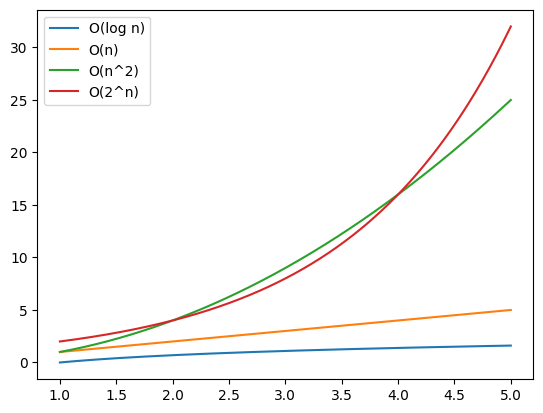

In [70]:
# что этот код делает можно не понимать 

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 5, 500)

plt.plot(x, np.log(x), label='O(log n)')
plt.plot(x, x, label='O(n)')
plt.plot(x, x**2, label='O(n^2)')
# plt.plot(x, 100*x**2, label='O(n^2)')
plt.plot(x, 2**x, label='O(2^n)')
plt.legend();

In [58]:
a = [1, 2, 3, 4, 5] # n

target = 5

ans = []
for item in a:
    for jtem in a:
        if item + jtem == target:
            ans.append((item, jtem))
ans

[(1, 4), (2, 3), (3, 2), (4, 1)]

In [59]:
a = [1, 2, 3, 4, 5] # n
n = len(a)

target = 5

ans = []
for i in range(n):
    for j in range(i + 1, n):
        if a[i] + a[j] == target:
            ans.append((a[i], a[j]))
ans

[(1, 4), (2, 3)]

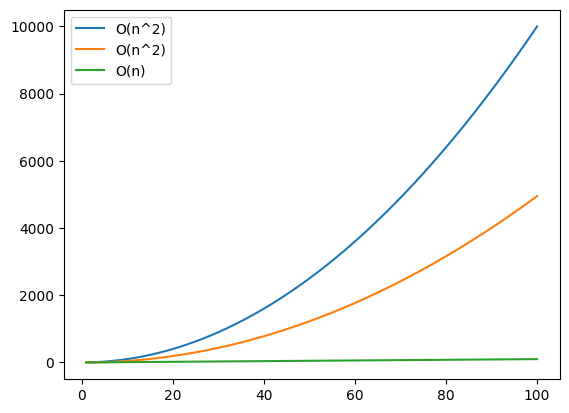

In [73]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 100, 500)

plt.plot(x, x**2, label='O(n^2)')
plt.plot(x, 0.5*x**2 - 0.5*x, label='O(n^2)')
plt.plot(x, x, label='O(n)')
plt.legend();

# Рекурсия


Найти $n-$ое число Фибоначчи

$$
a_n = a_{n-1} + a_{n-2}
$$

$$
a_0 = 0, a_1 = 1
$$

In [90]:
# T(n) = O(n)
# M(n) = O(1)  # константная память независимо от размера входа

# Что надо сделать с кодом, чтобы сложность по памяти возрасла до 
# M(n) = O(n) 

# Ответ: давайте создадим список и будем append туда каждое новое число!

def fib(n):
    a,b = 0, 1

    if n == 0:
        ans = a
    elif n == 1:
        ans = b
    else:
        for i in range(n):
            c = a + b
            a, b = c, a
        ans = c
    return ans

In [85]:
# Рекурсия - это когда функция обращается сама к себе
# Если мне надо посчитать факториал:

# T(n) = O(n)
# M(n) = O(1)
n = 5
s = 1
for i in range(2, n + 1):
    s *= i
print(s)

120


In [87]:
def fac(n):
    if n == 1 or n == 0:
        return 1
    else:
        return n * fac(n - 1)

# T(n) = O(n)
#fac(5) = 5*fac(4) = 5*4*fac(3) = 5*4*3*fac(2) = 5*4*3*2*fac(1) = 5*4*3*2*1 = 120

fac(5)

120

In [88]:
def fac(n):
    return n * fac(n - 1)
fac(5)

RecursionError: maximum recursion depth exceeded

In [93]:
def fib_r(n):
    if n == 1 or n == 2:
        return 1
    else:
        return fib_r(n - 1) + fib_r(n - 2)
        
fib_r(10)

55

In [97]:
%%timeit
fib(10)

370 ns ± 4.12 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [98]:
%%timeit
fib_r(10)

6.51 µs ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
